/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


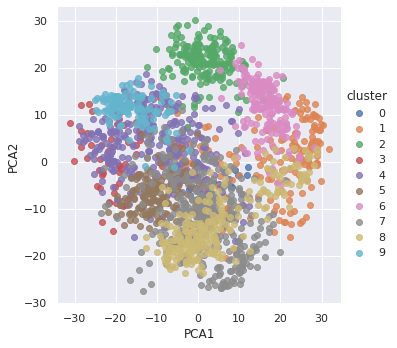

In [75]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd

digits = load_digits()
X = digits.data
y = digits.target

from sklearn import mixture 

XX = pd.DataFrame(digits.data)

from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
model.fit(digits.data)                    
X_2D = model.transform(digits.data)  

XX['PCA1'] = X_2D[:, 0]
XX['PCA2'] = X_2D[:, 1]


model_GMM = mixture.GaussianMixture(n_components=10,
            covariance_type='full')  
model_GMM.fit(digits.data)                    
y_gmm = model_GMM.predict(digits.data)   

XX['cluster'] = y_gmm

sns.lmplot("PCA1", "PCA2", data=XX, hue='cluster',
            fit_reg=False);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


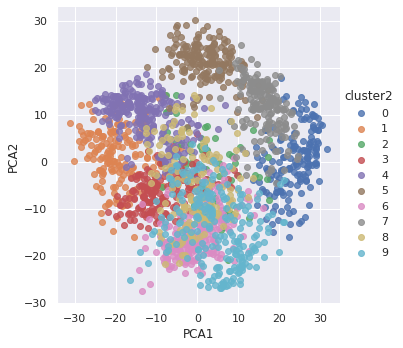

In [79]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0)
y_kmeans = kmeans.fit_predict(digits.data)

XX['cluster2'] = y_kmeans

sns.lmplot("PCA1", "PCA2", data=XX, hue='cluster2',
            fit_reg=False);




GaussianNB accuracy: 0.8333333333333334


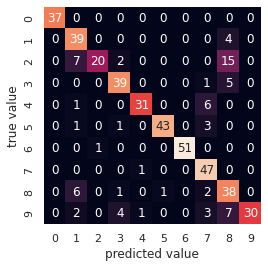

In [78]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
print("GaussianNB accuracy:", accuracy_score(ytest, y_model))

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

Knn accuracy: 0.9844444444444445


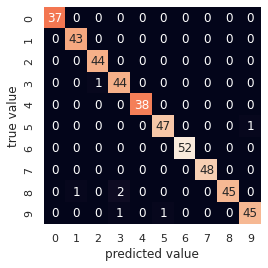

In [77]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors = 2)
model1.fit(Xtrain, ytrain)
y_model_1 = model1.predict(Xtest)

print("Knn accuracy:", accuracy_score(ytest, y_model_1))

knn = confusion_matrix(ytest, y_model_1)

sns.heatmap(knn, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


SVM accuracy: 0.9911111111111112


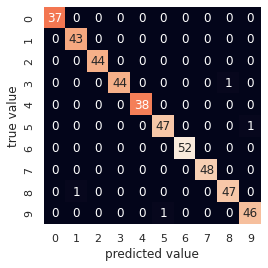

In [76]:
from sklearn import svm

model2 = svm.SVC()
model2.fit(Xtrain, ytrain)
y_model_2 = model2.predict(Xtest)

print("SVM accuracy:", accuracy_score(ytest, y_model_2))

svm = confusion_matrix(ytest, y_model_2)

sns.heatmap(svm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
